In [14]:
# importing modules 
import tensorflow as tf 
import numpy as np 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Activation 
import matplotlib.pyplot as plt 

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 

In [3]:
# nb_classes = 10

# def indices_to_one_hot(data, nb_classes):
#     """Convert an iterable of indices to one-hot encoded labels."""
#     targets = np.array(data).reshape(-1)
#     return np.eye(nb_classes)[targets]

# y_train = indices_to_one_hot(y_train,nb_classes)
# y_test = indices_to_one_hot(y_test,nb_classes)

In [16]:
# Cast the records into float values 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
  
# normalize image pixel values by dividing  
# by 255 
gray_scale = 255
x_train /= gray_scale 
x_test /= gray_scale 

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [18]:
print("Train data size : ",x_train.shape," ",y_train.shape) 
print("val data size : ",x_val.shape," ",y_val.shape) 
print("test data size : ",x_test.shape," ",y_test.shape) 

Train data size :  (48000, 28, 28)   (48000,)
val data size :  (12000, 28, 28)   (12000,)
test data size :  (10000, 28, 28)   (10000,)


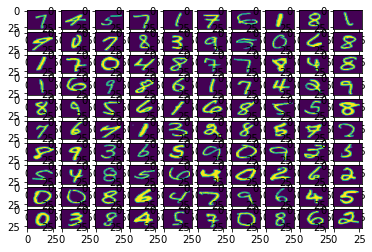

In [19]:
fig, ax = plt.subplots(10, 10) 
k = 0
for i in range(10): 
    for j in range(10): 
        ax[i][j].imshow(x_train[k].reshape(28, 28),  
                        aspect='auto') 
        k += 1
plt.show() 

In [39]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [40]:
model = Sequential([ 
    Flatten(input_shape=(28, 28)), 
    
    Dense(256, activation='relu'),   

    Dense(128, activation='relu'),  

    Dense(10, activation='sigmoid'),   
]) 

# with Adam optimizor

In [41]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

In [42]:
model.fit(x_train, y_train, epochs=1000,callbacks=[callback],  
          batch_size=200,  
          validation_data = (x_val,y_val)) 

Epoch 1/1000
240/240 [==============================] - 1s 4ms/step - loss: 0.3445 - accuracy: 0.9026 - val_loss: 0.1727 - val_accuracy: 0.9483
Epoch 2/1000
240/240 [==============================] - 1s 4ms/step - loss: 0.1317 - accuracy: 0.9618 - val_loss: 0.1102 - val_accuracy: 0.9668
Epoch 3/1000
240/240 [==============================] - 1s 4ms/step - loss: 0.0904 - accuracy: 0.9733 - val_loss: 0.0958 - val_accuracy: 0.9695
Epoch 4/1000
240/240 [==============================] - 1s 4ms/step - loss: 0.0626 - accuracy: 0.9809 - val_loss: 0.0885 - val_accuracy: 0.9728
Epoch 5/1000
240/240 [==============================] - 1s 4ms/step - loss: 0.0471 - accuracy: 0.9864 - val_loss: 0.0779 - val_accuracy: 0.9765
Epoch 6/1000
240/240 [==============================] - 1s 4ms/step - loss: 0.0352 - accuracy: 0.9896 - val_loss: 0.0815 - val_accuracy: 0.9743
Epoch 7/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0768 - val_accuracy:

#adam with patience = 3 early stopped at 5th epoch
#and got loss and accuracy as :  [0.07514506578445435, 0.9794999957084656]

adam with patience = 5 early stopped at 13th epoch 
and got the loss and accuracy as : [0.08110997825860977, 0.9779999852180481]

#more patience lead to less accuracy

In [43]:
results = model.evaluate(x_test,  y_test, verbose = 0) 
print('test loss, test acc:', results)

test loss, test acc: [0.08110997825860977, 0.9779999852180481]


# with SGD

In [45]:
model.compile(optimizer='SGD', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

In [46]:
model.fit(x_train, y_train, epochs=1000,callbacks=[callback],  
          batch_size=200,  
          validation_data = (x_val,y_val)) 

Epoch 1/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0769 - val_accuracy: 0.9813
Epoch 2/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.0755 - val_accuracy: 0.9816
Epoch 3/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 0.0748 - val_accuracy: 0.9815
Epoch 4/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 0.0743 - val_accuracy: 0.9818
Epoch 5/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0029 - accuracy: 0.9998 - val_loss: 0.0739 - val_accuracy: 0.9821
Epoch 6/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.0738 - val_accuracy: 0.9823
Epoch 7/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0026 - accuracy: 0.9999 - val_loss: 0.0736 - val_accuracy:

#SBD patience = 3 early stopped at 32nd epoch
#and got loss and accuracy as :  [0.06959852576255798, 0.9821000099182129]

#SBD with patience = 5 early stopped at 17th epoch #and got loss and accuracy as : [0.06649643927812576, 0.983299970626831]

We might have been fine with more patience value and got a good loss and acc values

In [47]:
results = model.evaluate(x_test,  y_test, verbose = 0) 
print('test loss, test acc:', results)

test loss, test acc: [0.06649643927812576, 0.983299970626831]


# with AdaGrad

In [48]:
model.compile(optimizer='AdaGrad', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

In [49]:
model.fit(x_train, y_train, epochs=1000,callbacks=[callback],  
          batch_size=200,  
          validation_data = (x_val,y_val)) 

Epoch 1/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 0.0733 - val_accuracy: 0.9824
Epoch 2/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 0.0734 - val_accuracy: 0.9824
Epoch 3/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 0.0734 - val_accuracy: 0.9824
Epoch 4/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0734 - val_accuracy: 0.9824
Epoch 5/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0734 - val_accuracy: 0.9824
Epoch 6/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0734 - val_accuracy: 0.9824


#AdaGrad with patience = 3 early stopped at 4th epoch
#and got loss and accuracy as :  [0.0696006491780281, 0.9821000099182129]

#AdaGrad with patience = 5 early stopped at 6th epoch #and got loss and accuracy as : [0.06652361899614334, 0.9833999872207642]

We might have been fine with more patience value and got a good loss and acc values

In [50]:
results = model.evaluate(x_test,  y_test, verbose = 0) 
print('test loss, test acc:', results)

test loss, test acc: [0.06652361899614334, 0.9833999872207642]


# with RMSprop

In [51]:
model.compile(optimizer='AdaGrad', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

In [52]:
model.fit(x_train, y_train, epochs=1000,callbacks=[callback],  
          batch_size=200,  
          validation_data = (x_val,y_val)) 

Epoch 1/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0734 - val_accuracy: 0.9824
Epoch 2/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0734 - val_accuracy: 0.9824
Epoch 3/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0734 - val_accuracy: 0.9823
Epoch 4/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0734 - val_accuracy: 0.9822
Epoch 5/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0734 - val_accuracy: 0.9822
Epoch 6/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0735 - val_accuracy: 0.9822


#AdaGrad with patience = 3 early stopped at 4th epoch
#and got loss and accuracy as :  [0.06960925459861755, 0.9821000099182129]

#AdaGrad with patience = 5 early stopped at 6th epoch
#and got loss and accuracy as :  [0.06655987352132797, 0.9835000038146973]

In [53]:
results = model.evaluate(x_test,  y_test, verbose = 0) 
print('test loss, test acc:', results)

test loss, test acc: [0.06655987352132797, 0.9835000038146973]


# with Adadelta

In [55]:
model.compile(optimizer='Adadelta', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

In [56]:
model.fit(x_train, y_train, epochs=1000,callbacks=[callback],  
          batch_size=200,  
          validation_data = (x_val,y_val)) 

Epoch 1/1000
240/240 [==============================] - 1s 5ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0735 - val_accuracy: 0.9822
Epoch 2/1000
240/240 [==============================] - 1s 4ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0735 - val_accuracy: 0.9822
Epoch 3/1000
240/240 [==============================] - 1s 4ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.0735 - val_accuracy: 0.9822
Epoch 4/1000
240/240 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.0735 - val_accuracy: 0.9822
Epoch 5/1000
240/240 [==============================] - 1s 5ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.0735 - val_accuracy: 0.9822
Epoch 6/1000
240/240 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.0735 - val_accuracy: 0.9822


with adadelta and patience value as 5 the model early stopped at 6th epoch with loss and acc as : [0.06656283140182495, 0.9836000204086304]

In [57]:
results = model.evaluate(x_test,  y_test, verbose = 0) 
print('test loss, test acc:', results)

test loss, test acc: [0.06656283140182495, 0.9836000204086304]


# This is program that impliments both early stopping and ana